In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
pd.set_option('display.max_columns', None)

In [120]:
df = pd.read_csv(r'C:\Users\mabin\Desktop\DataScienceClassNotes\Career247_Capstone_Project\Fraud_Detection_Project\data\raw\cleaned_data_v2.csv')

In [121]:
df.shape

(50000, 33)

In [122]:
df.head()

,transaction_date,transaction_time,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,cust_txn_count,cust_fraud_count,cust_fraud_rate,cust_avg_amt,amt_deviation,amt_ratio,device_count,new_device_flag,merchant_fraud_rate,otp_risk,combined_risk,is_fraud
0,2024-01-01,23:35:00,556.63,UPI,0,Fashion,0.041787,0.841375,0,3294.64,2,0,0,3DS,0.960875,1,4,0.063596,23,0,0,11,0,0.0,9659.361818,-9102.731818,0.057620,11,1,0.073620,0.039125,0.029911,0
1,2024-01-01,23:51:00,10158.89,CARD,0,Gaming,0.162148,0.119578,1,4163.76,9,1,0,OTP,0.674188,2,4,0.057505,23,0,0,11,0,0.0,9659.361818,499.528182,1.051606,11,1,0.099448,0.325812,0.094997,0
2,2024-01-10,19:49:00,15754.57,UPI,0,Grocery,0.774662,0.718447,8,5077.26,9,0,1,OTP,0.604628,2,1,0.053729,19,2,0,11,0,0.0,9659.361818,6095.208182,1.630847,11,1,0.077844,0.395372,0.102428,0
3,2024-01-20,13:00:00,6095.68,CARD,0,Fashion,0.259900,0.069586,2,1187.30,10,0,0,NONE,0.968040,2,0,0.004334,13,5,1,11,0,0.0,9659.361818,-3563.681818,0.630999,11,1,0.086486,0.031960,0.032338,0
4,2024-01-23,10:37:00,15324.24,UPI,0,Gaming,0.376711,0.286630,7,10936.02,8,0,0,OTP,0.711123,1,3,0.131218,10,1,0,11,0,0.0,9659.361818,5664.878182,1.586301,11,1,0.096386,0.288877,0.086691,0


In [123]:
df['new_device_flag'].value_counts()

new_device_flag
1    50000
Name: count, dtype: int64

In [124]:
df.drop(columns='new_device_flag',inplace=True,axis=1)

In [125]:
# Here the date and time columns are irrelevant it will misleading for feature selection process

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day

df = df.drop(columns=['transaction_date','transaction_time'])

In [126]:
# Changing the is_fraud column position

col = df.pop('is_fraud')
df['is_fraud'] = col

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   amount                          50000 non-null  float64
 1   payment_method                  50000 non-null  object 
 2   is_international                50000 non-null  int64  
 3   merchant_category               50000 non-null  object 
 4   ip_address_risk_score           50000 non-null  float64
 5   device_trust_score              50000 non-null  float64
 6   txn_count_last_24h              50000 non-null  int64  
 7   avg_amount_last_24h             50000 non-null  float64
 8   merchant_diversity_last_7d      50000 non-null  int64  
 9   device_change_flag              50000 non-null  int64  
 10  location_change_flag            50000 non-null  int64  
 11  authentication_method           50000 non-null  object 
 12  otp_success_rate_customer       

<Axes: >

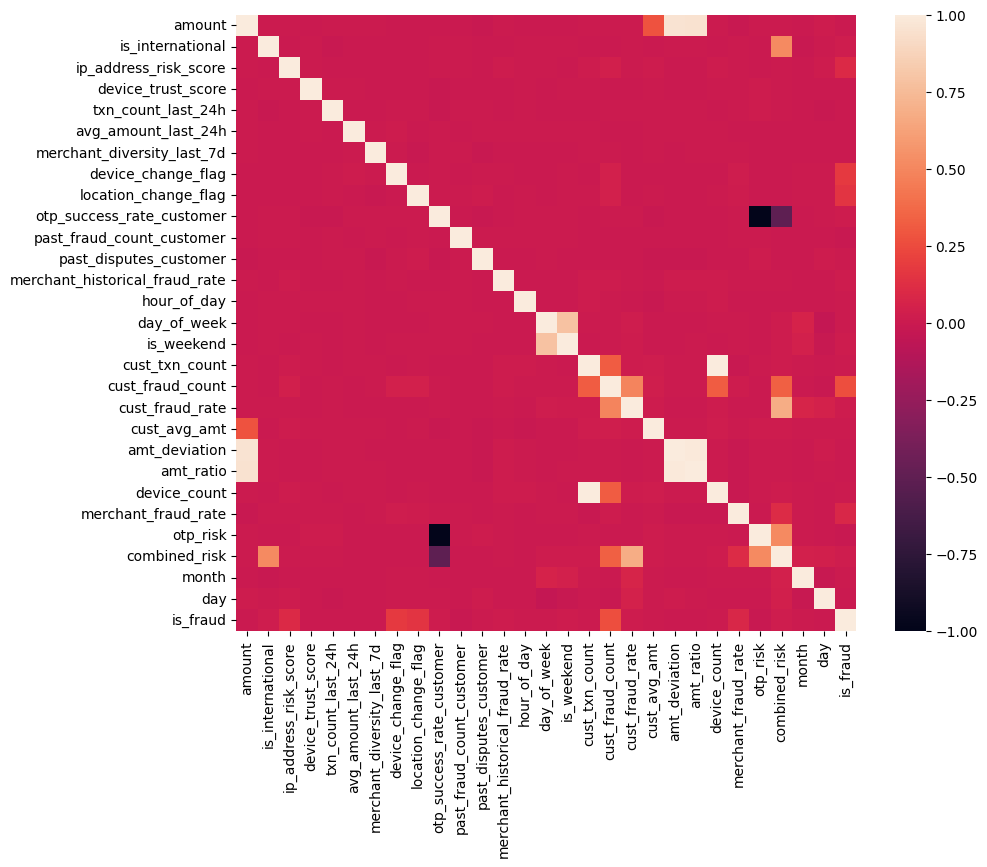

In [128]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['int','float']).corr())

In [129]:
df.select_dtypes(include=['int','float']).corr()['is_fraud'].sort_values(ascending=False)

is_fraud                          1.000000
cust_fraud_count                  0.265416
device_change_flag                0.179381
location_change_flag              0.153269
ip_address_risk_score             0.097142
merchant_fraud_rate               0.078462
combined_risk                     0.020097
is_international                  0.017377
merchant_historical_fraud_rate    0.015068
cust_fraud_rate                   0.011374
is_weekend                        0.009500
otp_success_rate_customer         0.009362
month                             0.007065
cust_avg_amt                      0.005161
device_count                      0.004938
cust_txn_count                    0.004838
hour_of_day                       0.004013
day_of_week                       0.002144
past_disputes_customer            0.001084
txn_count_last_24h               -0.001403
device_trust_score               -0.002705
avg_amount_last_24h              -0.003423
amount                           -0.004143
amt_ratio  

In [130]:
from sklearn.preprocessing import OrdinalEncoder

# Creating copy of data
encode_df = df.copy()

categorical_col = df.select_dtypes(include=['object']).columns

for col in categorical_col:
    oe = OrdinalEncoder()
    encode_df[col] = oe.fit_transform(encode_df[[col]])
    
X_label = encode_df.drop('is_fraud', axis=1)
y_label = encode_df['is_fraud']

In [131]:
X_label

,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,cust_txn_count,cust_fraud_count,cust_fraud_rate,cust_avg_amt,amt_deviation,amt_ratio,device_count,merchant_fraud_rate,otp_risk,combined_risk,month,day
0,556.63,2.0,0,1.0,0.041787,0.841375,0,3294.64,2,0,0,0.0,0.960875,1,4,0.063596,23,0,0,11,0,0.000000,9659.361818,-9102.731818,0.057620,11,0.073620,0.039125,0.029911,1,1
1,10158.89,0.0,0,2.0,0.162148,0.119578,1,4163.76,9,1,0,2.0,0.674188,2,4,0.057505,23,0,0,11,0,0.000000,9659.361818,499.528182,1.051606,11,0.099448,0.325812,0.094997,1,1
2,15754.57,2.0,0,3.0,0.774662,0.718447,8,5077.26,9,0,1,2.0,0.604628,2,1,0.053729,19,2,0,11,0,0.000000,9659.361818,6095.208182,1.630847,11,0.077844,0.395372,0.102428,1,10
3,6095.68,0.0,0,1.0,0.259900,0.069586,2,1187.30,10,0,0,1.0,0.968040,2,0,0.004334,13,5,1,11,0,0.000000,9659.361818,-3563.681818,0.630999,11,0.086486,0.031960,0.032338,1,20
4,15324.24,2.0,0,2.0,0.376711,0.286630,7,10936.02,8,0,0,2.0,0.711123,1,3,0.131218,10,1,0,11,0,0.000000,9659.361818,5664.878182,1.586301,11,0.096386,0.288877,0.086691,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,12630.59,0.0,0,3.0,0.102309,0.238358,3,5110.92,9,0,0,2.0,0.836704,0,1,0.067406,21,2,0,17,1,0.083333,11353.645882,1276.944118,1.112372,17,0.112360,0.163296,0.091367,3,20
49996,1099.42,2.0,1,2.0,0.016301,0.151638,5,4640.85,7,0,0,2.0,0.643141,1,1,0.017571,18,4,0,17,1,0.076923,11353.645882,-10254.225882,0.096826,17,0.072368,0.356859,0.316159,3,22
49997,10232.77,0.0,0,3.0,0.303687,0.913598,5,7005.29,5,0,0,2.0,0.552500,2,1,0.050602,1,5,1,17,1,0.071429,11353.645882,-1120.875882,0.901197,17,0.080537,0.447500,0.135090,3,23
49998,17653.29,3.0,0,1.0,0.232033,0.768544,3,14416.28,8,0,0,3.0,0.674756,0,2,0.000688,12,3,0,17,1,0.066667,11353.645882,6299.644118,1.554720,17,0.155280,0.325244,0.131633,3,28


In [132]:
y_label

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: is_fraud, Length: 50000, dtype: int64

### Using different technique to select the best features from the data

## Technique 1 - Correlation Analysis

<Axes: >

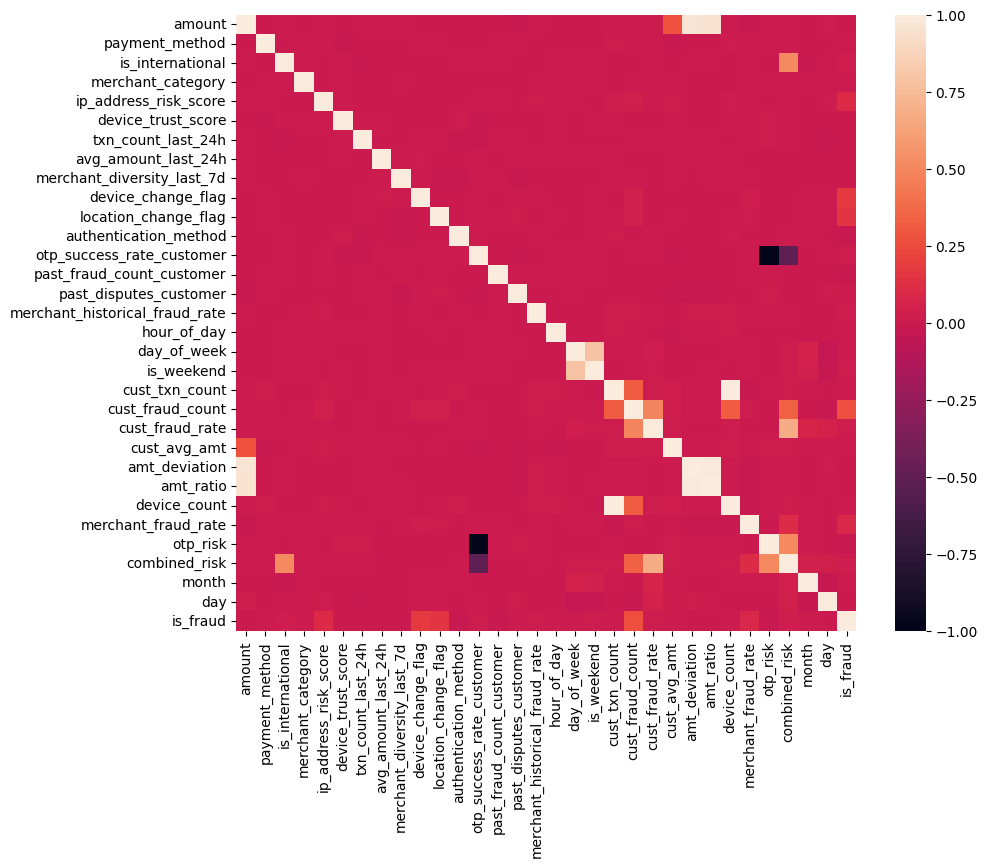

In [133]:
plt.figure(figsize=(10,8))
sns.heatmap(encode_df.corr())

In [134]:
fi_df1 = fi_df1 = encode_df.select_dtypes(include=['int','float']).corr()['is_fraud'].sort_values(ascending=False).iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','is_fraud':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,cust_fraud_count,0.265416
1,device_change_flag,0.179381
2,location_change_flag,0.153269
3,ip_address_risk_score,0.097142
4,merchant_fraud_rate,0.078462
5,combined_risk,0.020097
6,is_international,0.017377
7,merchant_historical_fraud_rate,0.015068
8,cust_fraud_rate,0.011374
9,is_weekend,0.009500


## Technique 2 - Random Forest Feature Importance

In [135]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
20,cust_fraud_count,0.084520
4,ip_address_risk_score,0.066967
21,cust_fraud_rate,0.057804
26,merchant_fraud_rate,0.055480
15,merchant_historical_fraud_rate,0.051932
7,avg_amount_last_24h,0.050318
5,device_trust_score,0.048681
22,cust_avg_amt,0.046036
30,day,0.042461
9,device_change_flag,0.042341


## Technique 3 - Gradient Boosting Feature importance

In [136]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
20,cust_fraud_count,0.413675
21,cust_fraud_rate,0.182060
9,device_change_flag,0.147270
10,location_change_flag,0.107098
4,ip_address_risk_score,0.049339
19,cust_txn_count,0.032612
26,merchant_fraud_rate,0.023114
29,month,0.022766
25,device_count,0.009811
28,combined_risk,0.002765


## Technique 4 - Permutation Importance

In [137]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
20,cust_fraud_count,0.492351
21,cust_fraud_rate,0.299676
29,month,0.085260
9,device_change_flag,0.070381
10,location_change_flag,0.046569
4,ip_address_risk_score,0.019519
28,combined_risk,0.017980
30,day,0.017776
19,cust_txn_count,0.017755
25,device_count,0.017511


## Technique 5 - LASSO

In [138]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
20,cust_fraud_count,0.083867
9,device_change_flag,0.040359
10,location_change_flag,0.032380
4,ip_address_risk_score,0.016747
26,merchant_fraud_rate,0.011044
2,is_international,0.000000
3,merchant_category,0.000000
6,txn_count_last_24h,-0.000000
5,device_trust_score,-0.000000
8,merchant_diversity_last_7d,-0.000000


## Technique 6 - RFE

In [139]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
20,cust_fraud_count,0.084911
4,ip_address_risk_score,0.066835
21,cust_fraud_rate,0.057505
26,merchant_fraud_rate,0.054342
15,merchant_historical_fraud_rate,0.052028
7,avg_amount_last_24h,0.050396
5,device_trust_score,0.049796
22,cust_avg_amt,0.045836
30,day,0.043037
9,device_change_flag,0.042185


## Technique 7 - Liner Regression Weights

In [140]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
20,cust_fraud_count,0.109230
9,device_change_flag,0.049026
10,location_change_flag,0.041234
4,ip_address_risk_score,0.026183
26,merchant_fraud_rate,0.021771
2,is_international,0.013751
18,is_weekend,0.005963
24,amt_ratio,0.005928
29,month,0.005570
15,merchant_historical_fraud_rate,0.003633


In [141]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [142]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
cust_fraud_count,0.265416,0.084520,0.413675,0.492351,0.083867,0.084911,0.109230
device_change_flag,0.179381,0.042341,0.147270,0.070381,0.040359,0.042185,0.049026
location_change_flag,0.153269,0.030002,0.107098,0.046569,0.032380,0.029395,0.041234
ip_address_risk_score,0.097142,0.066967,0.049339,0.019519,0.016747,0.066835,0.026183
merchant_fraud_rate,0.078462,0.055480,0.023114,0.006191,0.011044,0.054342,0.021771
combined_risk,0.020097,0.039623,0.002765,0.017980,-0.000000,0.040492,-0.015643
is_international,0.017377,0.001399,0.000859,0.000352,0.000000,0.001542,0.013751
merchant_historical_fraud_rate,0.015068,0.051932,0.002189,0.001494,0.000000,0.052028,0.003633
cust_fraud_rate,0.011374,0.057804,0.182060,0.299676,-0.027191,0.057505,-0.039238


In [143]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [144]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
cust_fraud_count                  0.258429
cust_fraud_rate                   0.142909
device_change_flag                0.074052
location_change_flag              0.052279
ip_address_risk_score             0.050251
month                             0.040443
merchant_fraud_rate               0.034650
merchant_historical_fraud_rate    0.026879
day                               0.025980
cust_txn_count                    0.025593
avg_amount_last_24h               0.025320
combined_risk                     0.024834
device_trust_score                0.024350
cust_avg_amt                      0.022736
device_count                      0.018990
amount                            0.016783
amt_deviation                     0.015637
hour_of_day                       0.015001
amt_ratio                         0.014431
otp_risk                          0.012677
txn_count_last_24h                0.012597
otp_success_rate_customer         0.012445
merchant_diversity_last_7d        0.012133
mer

Following the feature engineering phase, a feature selection process was conducted to identify and eliminate variables that contribute minimal predictive value to the target variable. Removing such features helps simplify the model, improve interpretability, and potentially reduce multicollinearity and overfitting.

To evaluate the impact of feature removal, a baseline Random Forest classifier was initially trained using all available features. Model performance was assessed using appropriate classification metrics such as Recall, F1-score, and ROC-AUC, given the imbalanced nature of the fraud detection problem.

Subsequently, low-importance or redundant features were removed based on feature importance analysis. The model was retrained using the reduced feature set, and performance metrics were compared against the baseline model. If the removal of specific features resulted in a significant decline in performance, those features were retained. Otherwise, they were permanently excluded from the dataset.

This iterative approach ensured that only meaningful and high-impact variables were retained, thereby improving model efficiency without compromising fraud detection capability.

In [145]:
X_label

,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,cust_txn_count,cust_fraud_count,cust_fraud_rate,cust_avg_amt,amt_deviation,amt_ratio,device_count,merchant_fraud_rate,otp_risk,combined_risk,month,day
0,556.63,2.0,0,1.0,0.041787,0.841375,0,3294.64,2,0,0,0.0,0.960875,1,4,0.063596,23,0,0,11,0,0.000000,9659.361818,-9102.731818,0.057620,11,0.073620,0.039125,0.029911,1,1
1,10158.89,0.0,0,2.0,0.162148,0.119578,1,4163.76,9,1,0,2.0,0.674188,2,4,0.057505,23,0,0,11,0,0.000000,9659.361818,499.528182,1.051606,11,0.099448,0.325812,0.094997,1,1
2,15754.57,2.0,0,3.0,0.774662,0.718447,8,5077.26,9,0,1,2.0,0.604628,2,1,0.053729,19,2,0,11,0,0.000000,9659.361818,6095.208182,1.630847,11,0.077844,0.395372,0.102428,1,10
3,6095.68,0.0,0,1.0,0.259900,0.069586,2,1187.30,10,0,0,1.0,0.968040,2,0,0.004334,13,5,1,11,0,0.000000,9659.361818,-3563.681818,0.630999,11,0.086486,0.031960,0.032338,1,20
4,15324.24,2.0,0,2.0,0.376711,0.286630,7,10936.02,8,0,0,2.0,0.711123,1,3,0.131218,10,1,0,11,0,0.000000,9659.361818,5664.878182,1.586301,11,0.096386,0.288877,0.086691,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,12630.59,0.0,0,3.0,0.102309,0.238358,3,5110.92,9,0,0,2.0,0.836704,0,1,0.067406,21,2,0,17,1,0.083333,11353.645882,1276.944118,1.112372,17,0.112360,0.163296,0.091367,3,20
49996,1099.42,2.0,1,2.0,0.016301,0.151638,5,4640.85,7,0,0,2.0,0.643141,1,1,0.017571,18,4,0,17,1,0.076923,11353.645882,-10254.225882,0.096826,17,0.072368,0.356859,0.316159,3,22
49997,10232.77,0.0,0,3.0,0.303687,0.913598,5,7005.29,5,0,0,2.0,0.552500,2,1,0.050602,1,5,1,17,1,0.071429,11353.645882,-1120.875882,0.901197,17,0.080537,0.447500,0.135090,3,23
49998,17653.29,3.0,0,1.0,0.232033,0.768544,3,14416.28,8,0,0,3.0,0.674756,0,2,0.000688,12,3,0,17,1,0.066667,11353.645882,6299.644118,1.554720,17,0.155280,0.325244,0.131633,3,28


In [146]:
y_label

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: is_fraud, Length: 50000, dtype: int64

In [147]:
X_label.shape

(50000, 31)

In [148]:
y_label.shape

(50000,)

In [149]:
df.head()

,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,cust_txn_count,cust_fraud_count,cust_fraud_rate,cust_avg_amt,amt_deviation,amt_ratio,device_count,merchant_fraud_rate,otp_risk,combined_risk,month,day,is_fraud
0,556.63,UPI,0,Fashion,0.041787,0.841375,0,3294.64,2,0,0,3DS,0.960875,1,4,0.063596,23,0,0,11,0,0.0,9659.361818,-9102.731818,0.057620,11,0.073620,0.039125,0.029911,1,1,0
1,10158.89,CARD,0,Gaming,0.162148,0.119578,1,4163.76,9,1,0,OTP,0.674188,2,4,0.057505,23,0,0,11,0,0.0,9659.361818,499.528182,1.051606,11,0.099448,0.325812,0.094997,1,1,0
2,15754.57,UPI,0,Grocery,0.774662,0.718447,8,5077.26,9,0,1,OTP,0.604628,2,1,0.053729,19,2,0,11,0,0.0,9659.361818,6095.208182,1.630847,11,0.077844,0.395372,0.102428,1,10,0
3,6095.68,CARD,0,Fashion,0.259900,0.069586,2,1187.30,10,0,0,NONE,0.968040,2,0,0.004334,13,5,1,11,0,0.0,9659.361818,-3563.681818,0.630999,11,0.086486,0.031960,0.032338,1,20,0
4,15324.24,UPI,0,Gaming,0.376711,0.286630,7,10936.02,8,0,0,OTP,0.711123,1,3,0.131218,10,1,0,11,0,0.0,9659.361818,5664.878182,1.586301,11,0.096386,0.288877,0.086691,1,23,0


In [150]:
df.to_csv(r'C:\Users\mabin\Desktop\DataScienceClassNotes\Career247_Capstone_Project\Fraud_Detection_Project\data\raw\cleaned_data_v3.csv', index=False)
